In [1]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data

,x (degree),y (V),sigma (V)
0,0,-0.849,0.05
1,5,-0.738,0.05
2,10,-0.537,0.05
3,15,-0.354,0.05
4,20,-0.196,0.05
5,25,-0.019,0.05
6,30,0.262,0.05
7,35,0.413,0.05
8,40,0.734,0.05
9,45,0.882,0.05


In [10]:
data = pd.read_csv('3_4_Thermocouple Calibration_Data.csv', delimiter=',')
xdata = data['x (degree)']; ydata = data['y (V)']; sigma = data['sigma (V)']
result = linregress(xdata,ydata)
slope = result[0]; intercept = result[1]; 

In [21]:
def func(x,a,b,c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(func, xdata, ydata, absolute_sigma=True, sigma= sigma, p0 = [0,slope, intercept])
err = np.sqrt(np.diag(pcov))
yval = func(xdata, popt[0], popt[1], popt[2])


Text(60, 0.3, 'start function: y = 0.043T+-1')

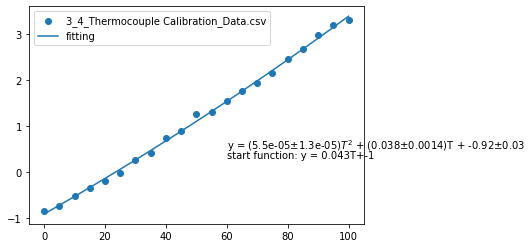

In [45]:
plt.scatter(xdata, ydata, label = "3_4_Thermocouple Calibration_Data.csv")
plt.plot(xdata, yval, label = 'fitting')
plt.legend()
plt.text(60,0.5, f'y = ({popt[0]:.2g}$\pm${err[0]:.2g}$)T^2$ + ({popt[1]:.2g}$\pm${err[1]:.2g})T + {popt[2]:.2g}$\pm${err[2]:.2g}')
plt.text(60,0.3, f'start function: y = {slope:.2g}T+{intercept:.2g}')